
Чигладзе Давид.ДЗ по линеной регрессии.Солнечная радиация.

сначала надо импортировать все библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

теперь импортируем и изучим датасет.

In [ ]:
data = pd.read_csv("/content/Train.csv")
data

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,...,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,...,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,...,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,...,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


Смотрим сколько данных пропушенно в нашем датафрейме

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [ ]:
data.isna().sum()

,0
Employee_ID,0
Gender,0
Age,412
Education_Level,0
Relationship_Status,0
Hometown,0
Unit,0
Decision_skill_possess,0
Time_of_service,144
Time_since_promotion,0


Дальше в датафрейме заменяем все не числовые значения которые принимают максимум 2 аргумента на 0 и 1, а все которые принимают больше просто удалили и создали новый датафрейм.

In [ ]:
data["Gender"] = data["Gender"].replace({"M": 1, "F": 0})
data["Relationship_Status"] = data["Relationship_Status"].replace({"Married": 1, "Single": 0})

mask_numeric = data.select_dtypes(include=['float64', 'int64']).columns
mask_categorical = data.nunique() <= 2
mask_combined = mask_categorical | data.columns.isin(mask_numeric)

new_data = data.loc[:, mask_combined]

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
new_data[numeric_columns] = new_data[numeric_columns].fillna(new_data[numeric_columns].mean())

print(new_data.isna().sum())

new_data.to_csv("Train-1_modified.csv", index=False)


Gender                  0
Age                     0
Education_Level         0
Relationship_Status     0
Time_of_service         0
Time_since_promotion    0
growth_rate             0
Travel_Rate             0
Post_Level              0
Pay_Scale               0
Work_Life_balance       0
VAR1                    0
VAR2                    0
VAR3                    0
VAR4                    0
VAR5                    0
VAR6                    0
VAR7                    0
Attrition_rate          0
dtype: int64


<ipython-input-9-600df3580c2c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Gender"] = data["Gender"].replace({"M": 1, "F": 0})
<ipython-input-9-600df3580c2c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Relationship_Status"] = data["Relationship_Status"].replace({"Married": 1, "Single": 0})
<ipython-input-9-600df3580c2c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

проверяем что убрали все пропуски сверху

Выводим датафрейм только с числовыми значениями


In [ ]:
new_data

,Gender,Age,Education_Level,Relationship_Status,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,0,42.0,4,1,4.0,4,33,1,1,7.0,3.0,4,0.7516,1.8688,2.000000,4,5,3,0.1841
1,1,24.0,3,0,5.0,4,36,0,3,6.0,4.0,3,-0.9612,-0.4537,2.000000,3,5,3,0.0670
2,0,58.0,3,1,27.0,3,51,0,2,8.0,1.0,4,-0.9612,-0.4537,3.000000,3,8,3,0.0851
3,0,26.0,3,0,4.0,3,56,1,3,8.0,1.0,3,-1.8176,-0.4537,1.891078,3,7,3,0.0668
4,0,31.0,1,1,5.0,4,62,1,3,2.0,3.0,1,0.7516,-0.4537,2.000000,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,23.0,5,1,4.0,1,20,1,2,6.0,3.0,1,0.7516,-0.4537,2.000000,3,7,3,0.7839
6996,0,44.0,1,1,16.0,2,59,0,2,4.0,3.0,2,-0.1048,-2.7762,2.000000,4,8,4,0.1055
6997,0,49.0,3,0,10.0,1,59,1,2,3.0,4.0,2,-0.1048,-0.4537,2.000000,4,8,3,0.7847
6998,0,47.0,3,1,24.0,1,21,1,5,8.0,2.0,4,0.7516,1.8688,2.000000,3,6,3,0.4162


Создаем матрицу кореляции по датафрейму

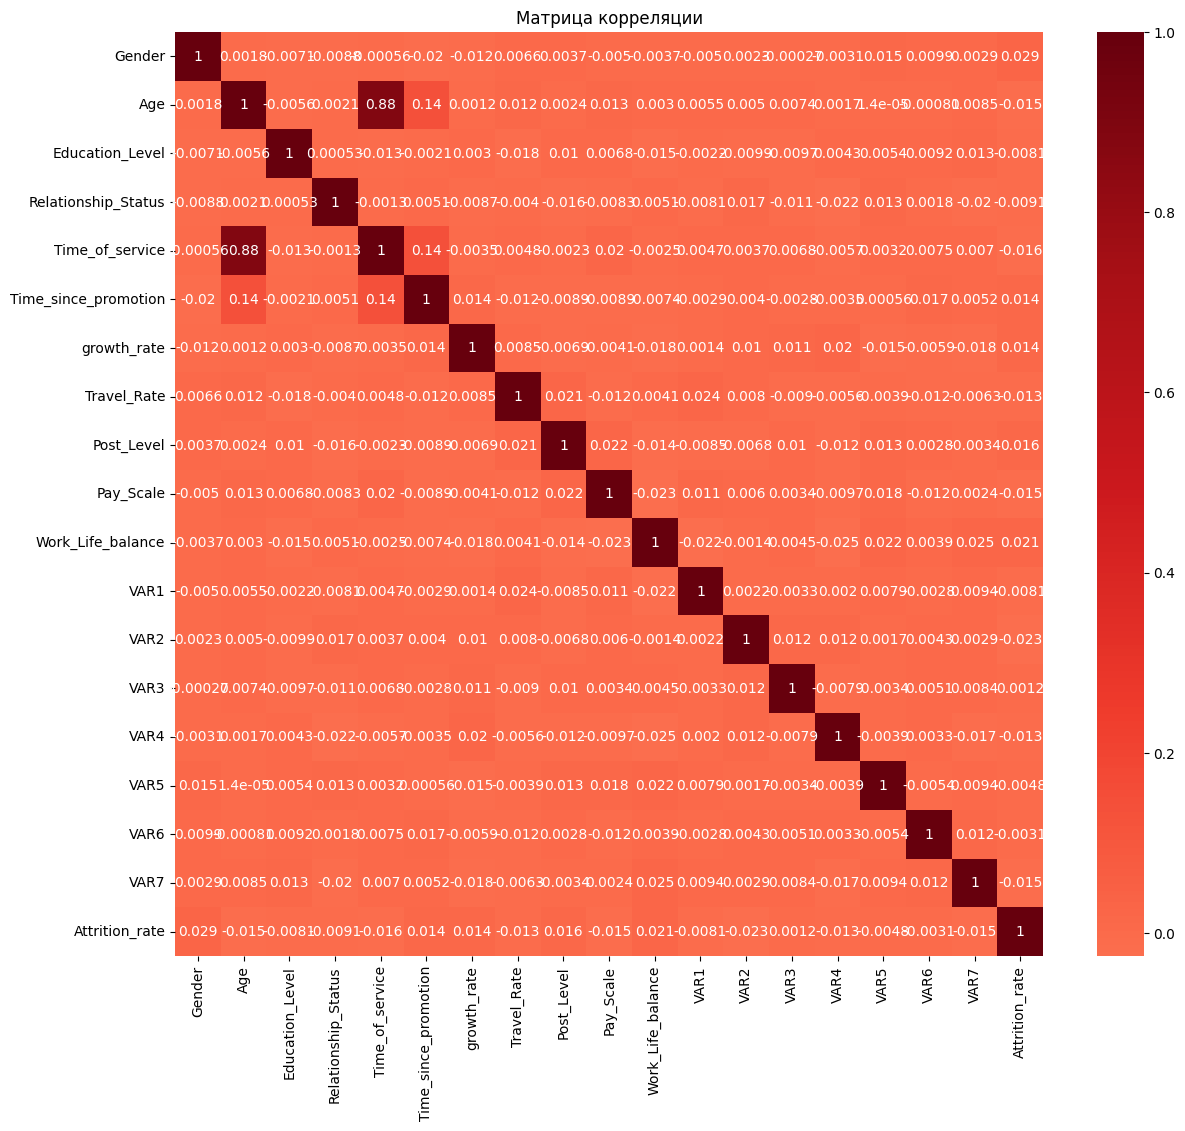

In [ ]:
plt.figure(figsize=(14,12))
correlation = new_data.corr(numeric_only=True)
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, cmap='Reds', center=0, annot=True)
plt.title("Матрица корреляции")
plt.show()

In [ ]:
X = new_data.loc[:, 'Gender':'VAR7']
y = new_data['Attrition_rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
lig_reg = LinearRegression()
lig_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
w0 = lig_reg.intercept_
w0

0.1639890440233471

In [ ]:
w1 = lig_reg.coef_
w1

array([ 1.69166864e-02,  8.30757921e-05,  4.07220326e-03, -7.81226245e-03,
       -2.53400981e-04,  3.91344172e-03,  2.19460295e-04, -2.84995611e-03,
        2.28419133e-03,  6.95995631e-04,  3.70846759e-03, -1.05435663e-03,
       -2.98277201e-03, -6.67648247e-04, -5.48771852e-03, -7.59697059e-04,
        3.00975398e-04, -4.34424987e-03])

In [ ]:
y_pred = lig_reg.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.1310631332668463
Mean Squared Error: 0.03718817502247406
R2 score: -0.008028150673467849


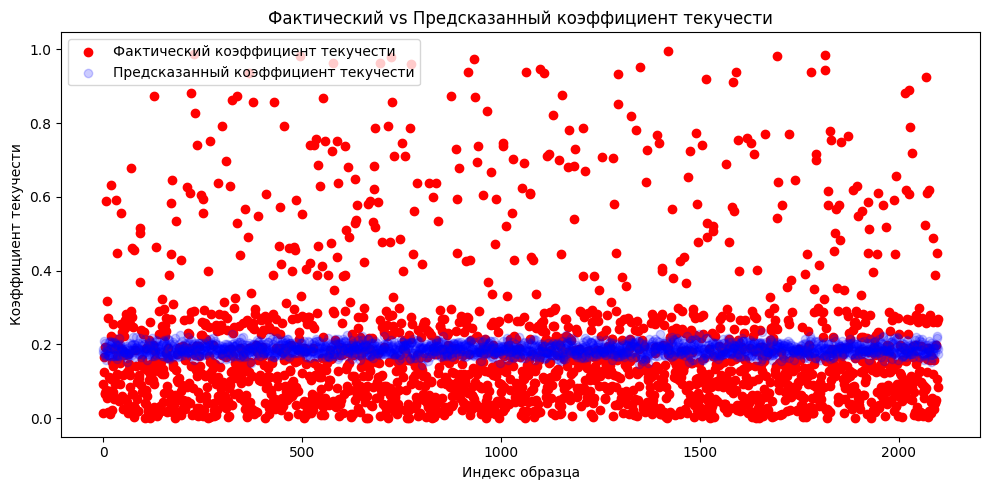

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, label='Фактический коэффициент текучести', color='red', alpha=1)
plt.scatter(range(len(y_pred)), y_pred, label='Предсказанный коэффициент текучести', color='blue', alpha=0.2)
plt.title('Фактический vs Предсказанный коэффициент текучести')
plt.xlabel('Индекс образца')
plt.ylabel('Коэффициент текучести')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# покажем что простое усреднение работает лучше

# X_train, X_test, y_train, y_test
val = y_test.mean()
y_pred = np.full(y_test.shape, val)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.13230984839002266
Mean Squared Error: 0.03689200048394332
R2 score: 0.0


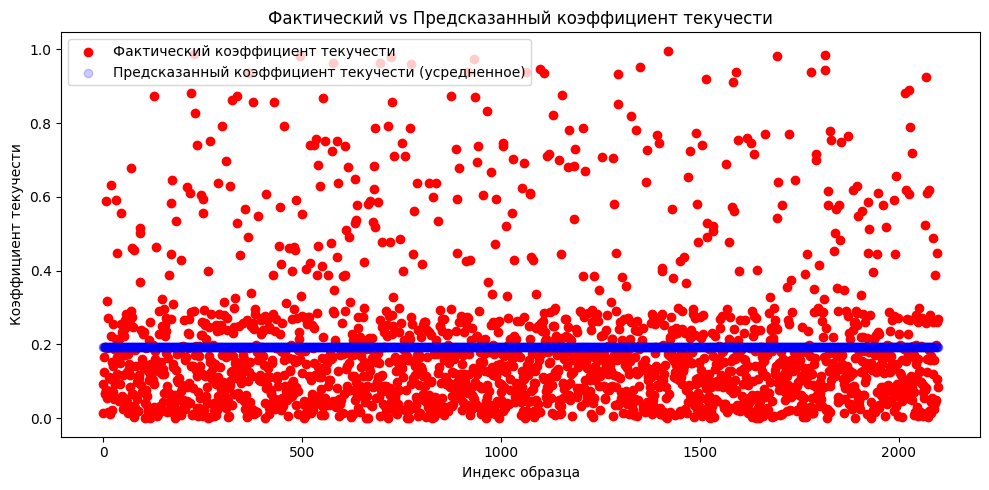

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, label='Фактический коэффициент текучести', color='red', alpha=1)
plt.scatter(range(len(y_pred)), y_pred, label='Предсказанный коэффициент текучести (усредненное)', color='blue', alpha=0.2)
plt.title('Фактический vs Предсказанный коэффициент текучести')
plt.xlabel('Индекс образца')
plt.ylabel('Коэффициент текучести')
plt.legend()
plt.tight_layout()
plt.show()
